머신러닝
1. 데이터 분석
  - 임의의 데이터들 간에 관계를 파악, 파악한 관계도를 가지고 새로운 출력 데이터를 생성하는 과정
  - 예측, 클러스트, 모사 등
  1-1. 예측
    - 숫자, 문서, 이미지, 영상, 음성등의 데이터를 분석 ---> 다른 데이터로 출력
    - 예측 모형
      1.1.1  - 부동산의 위치, 주거환경, 건축연도 등 부동산 지리 탐색
          .2  - 꽃잎의 길이와 너비등 식물에 외형적 특징을 주면 해당 식물의 종을 알아낸다.
          .3 - 얼굴사진을 주면 해당하는 사람의 이름을 출력
          .4 - 악보를 주면 악기의 기종에 따라 표현할 수 있는 소리를 알아낸다.
    - 시간 추출 및 시간 설계가 포함되지 않는다. = 시계열 분석

  1-2. 데이터 유형
    - 입력 데이터 : 분석의 기반이 데이터로 X로 표현
                         (독립변수 _ independent, 특징_feature, 설명변수_explanatory)

    - 출력 데이터 : 목적 데이터 Y로 표현
                         (종속변수 _dependent : 결과가 분류가 되어 있으면 label, class)

  1-3. 예측 문제 방법
    - rule- based = 입력데이터 + 규칙(알고리즘) -> 출력 [소량의 데이터/정형 데이터]
                         [ 영어 단어 사전 ]
    - data- based = traing - based(학습 기반) = 입력데이터 + 컴퓨터 규칙 -> 출력 [대량의 데이터/비정형]
                         [ 번역시스템 ]
                         = 학습용 데이터 집합(입력, 목표값) = 지도학습(supervised)
                         = 지도학습의 명확성을 학습용 데이터의 양과 질에 의존한다.
                         = 지도학습의 목표는 주어진 목표값과 비슷하거나 동일한 값을 출력하는 예측 방법

        ex) 얼굴사진(X) 주면 해당하는 사람의 이름을 출력(Y)
             a[홍길동], b[정길동], c[최길동]

=======================================================================
2. 지도학습과 비지도학습
  지도학습 : 회기 _선형, 비선형, 서포트 벡터, 결정트리, 신경망 등
  비지도학습 : 군집(k-Means), 계층군집, 기댓값, 시각화 차원축소, 연관 규칙학습 등

3. 머신러닝, 딥러닝, 강화학습
 - scipy(사이파이) : 고급 수학함수, 수치 함수, 적분, 미적분 방정식계산 _최적화, 신호처리
 - matplotlib : 시각화
 - seaborn : 시각화 + 통계차트  import seaborn as sns
 - statsmodels(스태츠 모델) 패키지 : 샘플 데이터, 회귀분석, 모의 검정, 이산 종속변수, 시계열 분석 등등
                                 영상이미지(상태공간 모형, 벡터 AR 모형)
 - scikit-learn(사이킷런) : 데이터 셋(회귀분석, 분류, 클러스트용 데이터 셋),
                                   전처리(스케일링, 결손치, 텍스트 토큰화), 지도학습, 비지도학습, 교차검증
 - missingno(패키지) : 판다스에서 데이터 결손치를 빠르게 찾아 시각화
 - 텍스트 전처리기용 패키지 : nltk -> spacy -> konlpy -> soynlp -> gensim
 - opencv : 이미지처리
 - librosa : 사운드 전처리
 - geopandas : 지리정보 전처리


In [11]:
from sklearn.datasets import fetch_20newsgroups  #문서 표본 데이터

#1. 카테고리
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

#2. 데이터 셋을 구현할 파일을 받자
#twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_train = fetch_20newsgroups()

#3. 이름을 확인
twenty_train.target_names

#4. 개수를 리턴 받아
len(twenty_train.data)
#print(type(twenty_train.data))

11314

In [12]:
#5. data를 인덱스 확인
print("확인 ", twenty_train.data[0])
print("매핑 ", twenty_train.target_names[twenty_train.target[0]])

확인  From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





매핑  rec.autos


In [13]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

rec.autos
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.graphics
sci.space
talk.politics.guns
sci.med
comp.sys.ibm.pc.hardware
comp.os.ms-windows.misc
comp.sys.mac.hardware


In [14]:
from sklearn.feature_extraction.text import CountVectorizer # 문서 데이터를 벡터로 변환
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data[:100])
X_train_counts.shape

(100, 6547)

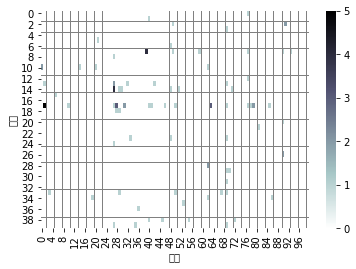

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(X_train_counts.toarray()[:40,:100],cmap = plt.cm.bone_r,linewidths = 0.001, linecolor = 'gray')  #40개의 문서와 100가지 단어를 추출
plt.xlabel("단어")
plt.ylabel("문서")
plt.show()